In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import pickle
import certifi
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline

In [82]:
df_train=pd.read_csv('Train.csv')

In [83]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
df_train.shape

(8523, 12)

In [85]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [87]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [88]:
#df_train.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [89]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [91]:
feature_cat=[]
feature_num=[]

for feature in df_train.columns:
    if df_train[feature].dtype=='object':
        feature_cat.append(feature)
    else:
        feature_num.append(feature)

In [92]:
print(feature_cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [93]:
print(feature_num)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [94]:
for feature in df_train.columns:
    print(feature,'percentage missing values:',100*df_train[feature].isnull().sum()/df_train.shape[0])

Item_Identifier percentage missing values: 0.0
Item_Weight percentage missing values: 17.165317376510618
Item_Fat_Content percentage missing values: 0.0
Item_Visibility percentage missing values: 0.0
Item_Type percentage missing values: 0.0
Item_MRP percentage missing values: 0.0
Outlet_Identifier percentage missing values: 0.0
Outlet_Establishment_Year percentage missing values: 0.0
Outlet_Size percentage missing values: 28.27642848762173
Outlet_Location_Type percentage missing values: 0.0
Outlet_Type percentage missing values: 0.0
Item_Outlet_Sales percentage missing values: 0.0


In [95]:
df_train[df_train['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

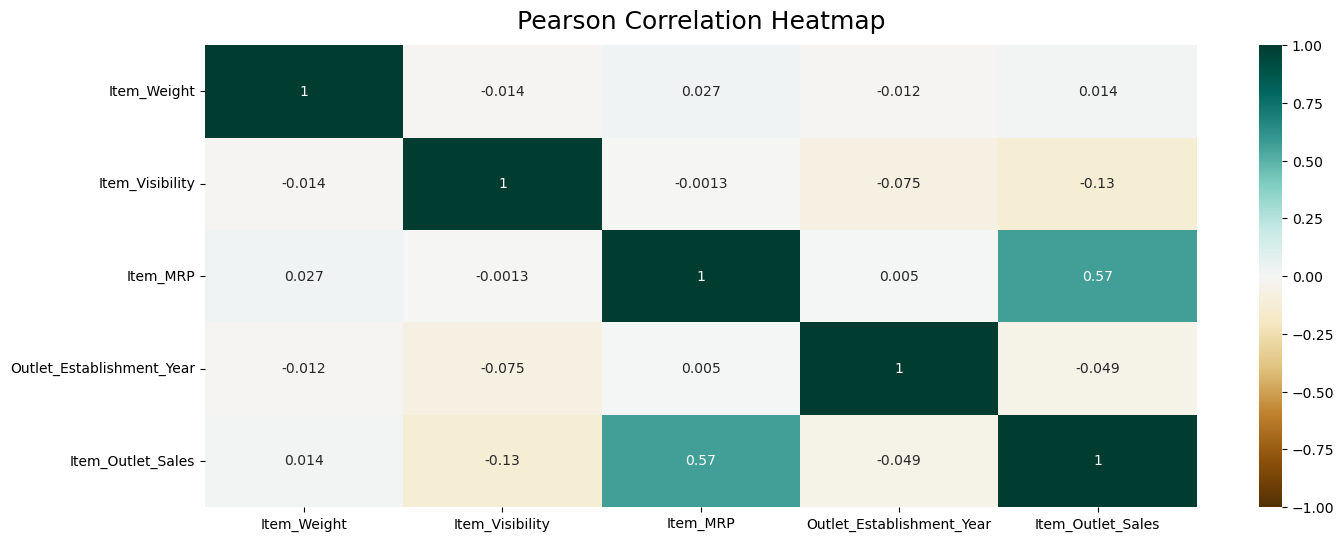

In [96]:
#checking correlation
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

In [97]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [99]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')

In [100]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')

In [101]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')

In [102]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [103]:
cat_ordinal=[]
cat_nominal=[]
for c in feature_cat:
    if (df_train[c].nunique()) >10:
        cat_nominal.append(c)
    else:
        cat_ordinal.append(c)


In [104]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [105]:
cat_ordinal

['Item_Fat_Content',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [106]:
cat_nominal

['Item_Identifier', 'Item_Type']

In [107]:
num_discrete=[]
num_continuous=[]
for c in feature_num:
    if (df_train[c].nunique()) >10:
        num_continuous.append(c)
    else:
        num_discrete.append(c)


In [108]:
print(num_continuous)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [109]:
print(num_discrete)

['Outlet_Establishment_Year']


In [110]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [111]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [112]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [113]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [114]:
# filling the missing values in "Item_weight column" with "Mean" value
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [115]:
# mode of "Outlet_Size" column
df_train['Outlet_Size'].mode().values[0]

'Medium'

In [116]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode().values[0],inplace=True)

In [117]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [118]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

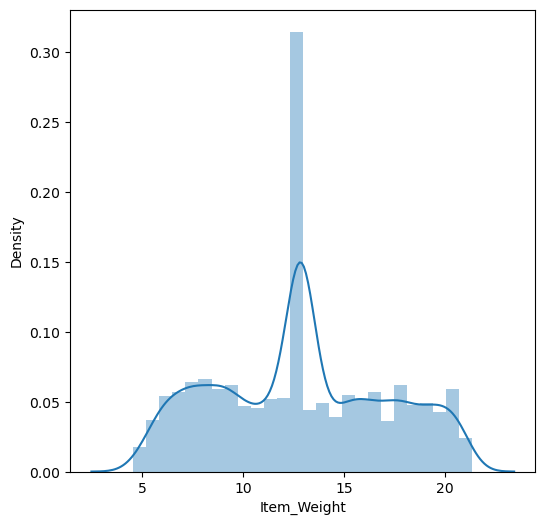

In [119]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Weight'])
plt.show()

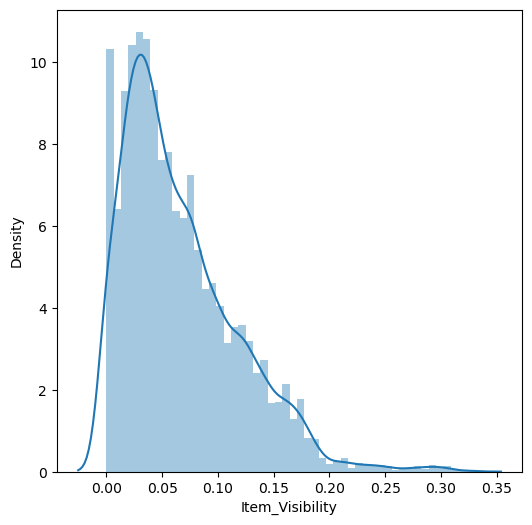

In [120]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

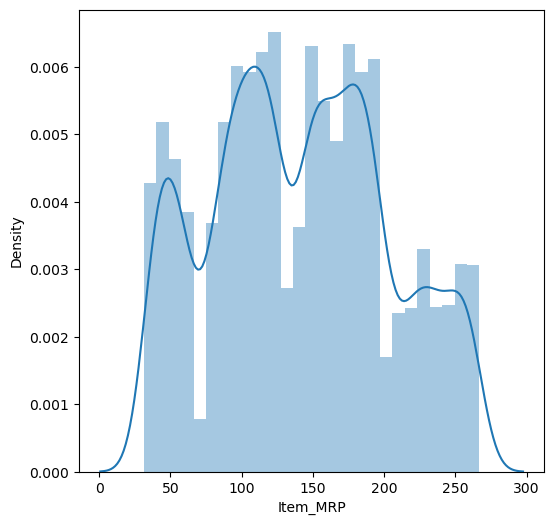

In [121]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_MRP'])
plt.show()

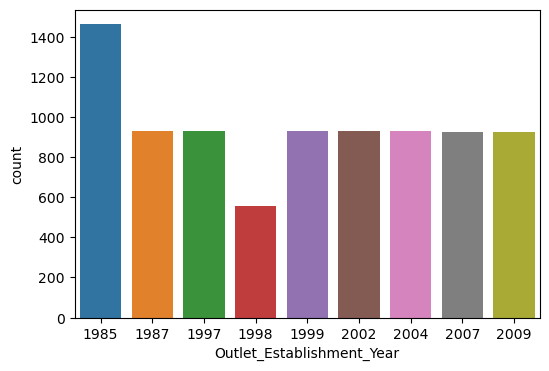

In [122]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

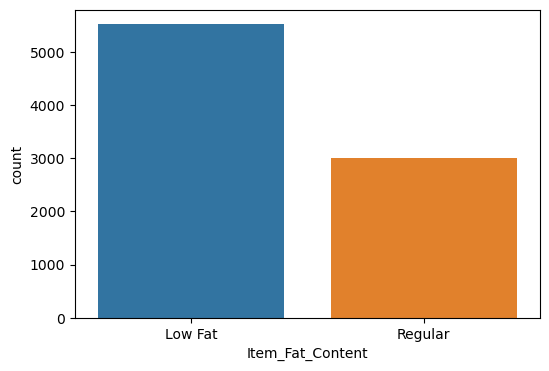

In [123]:
# Item_Fat_Content column
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

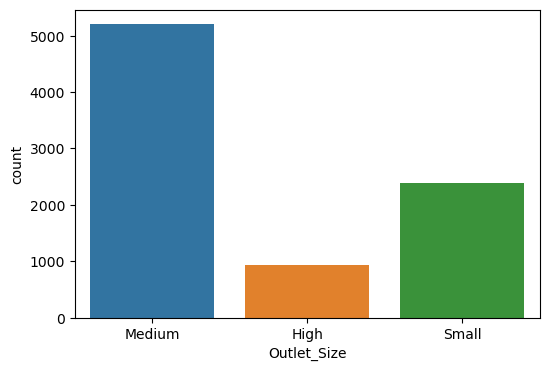

In [124]:
# Outlet_Size column
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show()

# Checking outliers

(-0.5, 15.5, 0.0, 20000.0)

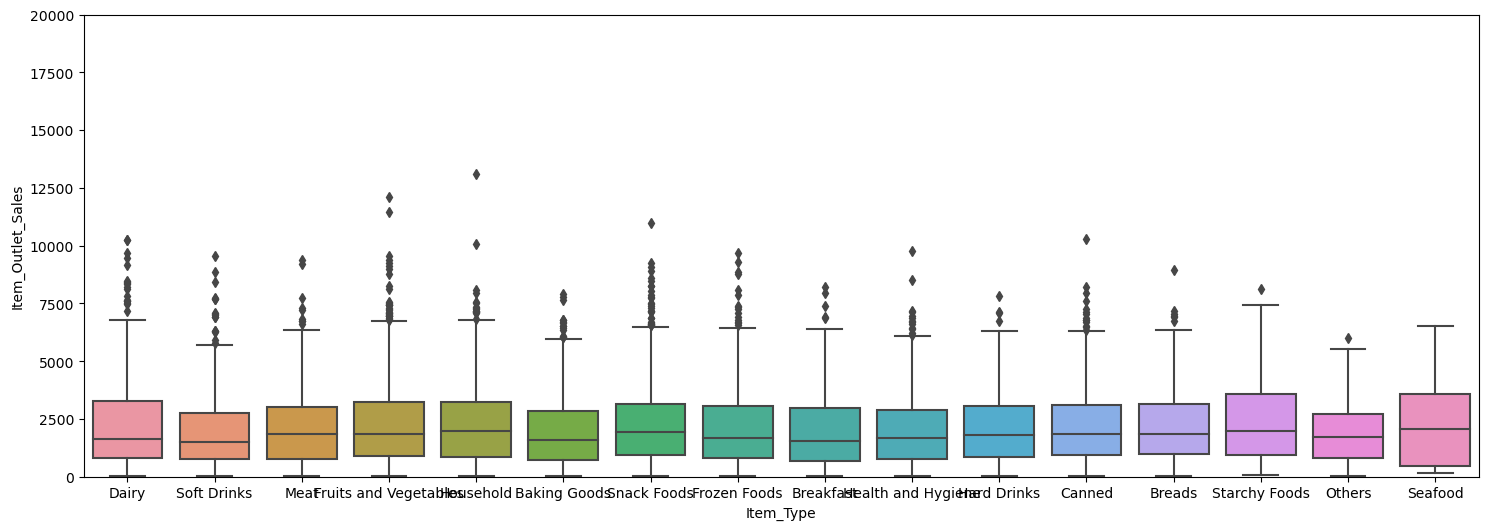

In [181]:
# Box plot of OverallQual vs SalePrice

data = pd.concat([df_train["Item_Type"], df_train["Item_Outlet_Sales"]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data)
fig.axis(ymin=0, ymax=20000)

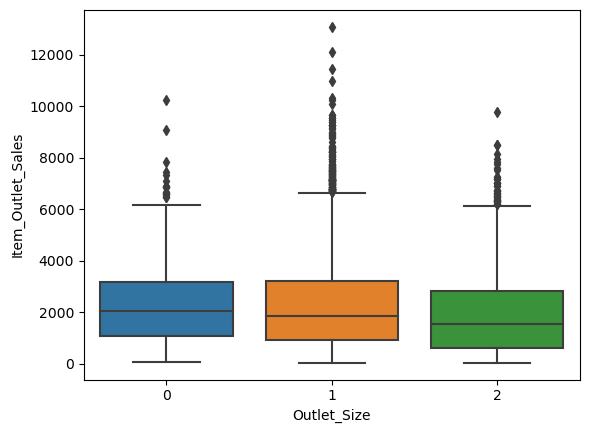

In [182]:
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df_train)
plt.show()

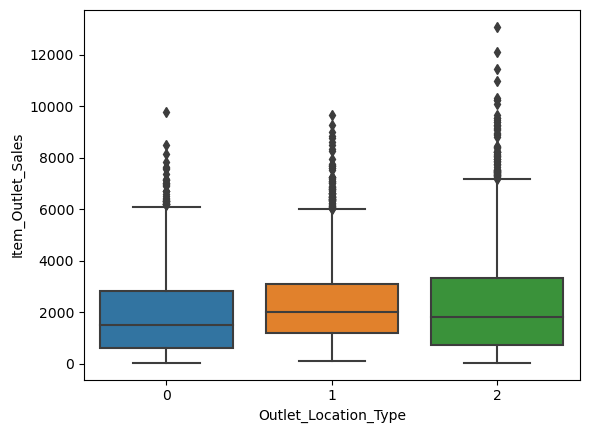

In [183]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = df_train)
plt.show()

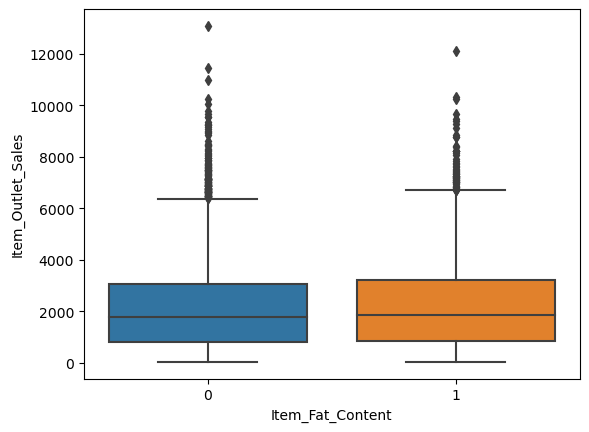

In [184]:
#Item fat content has repeating and redundant levels.
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df_train)
plt.show()

<BarContainer object of 8523 artists>

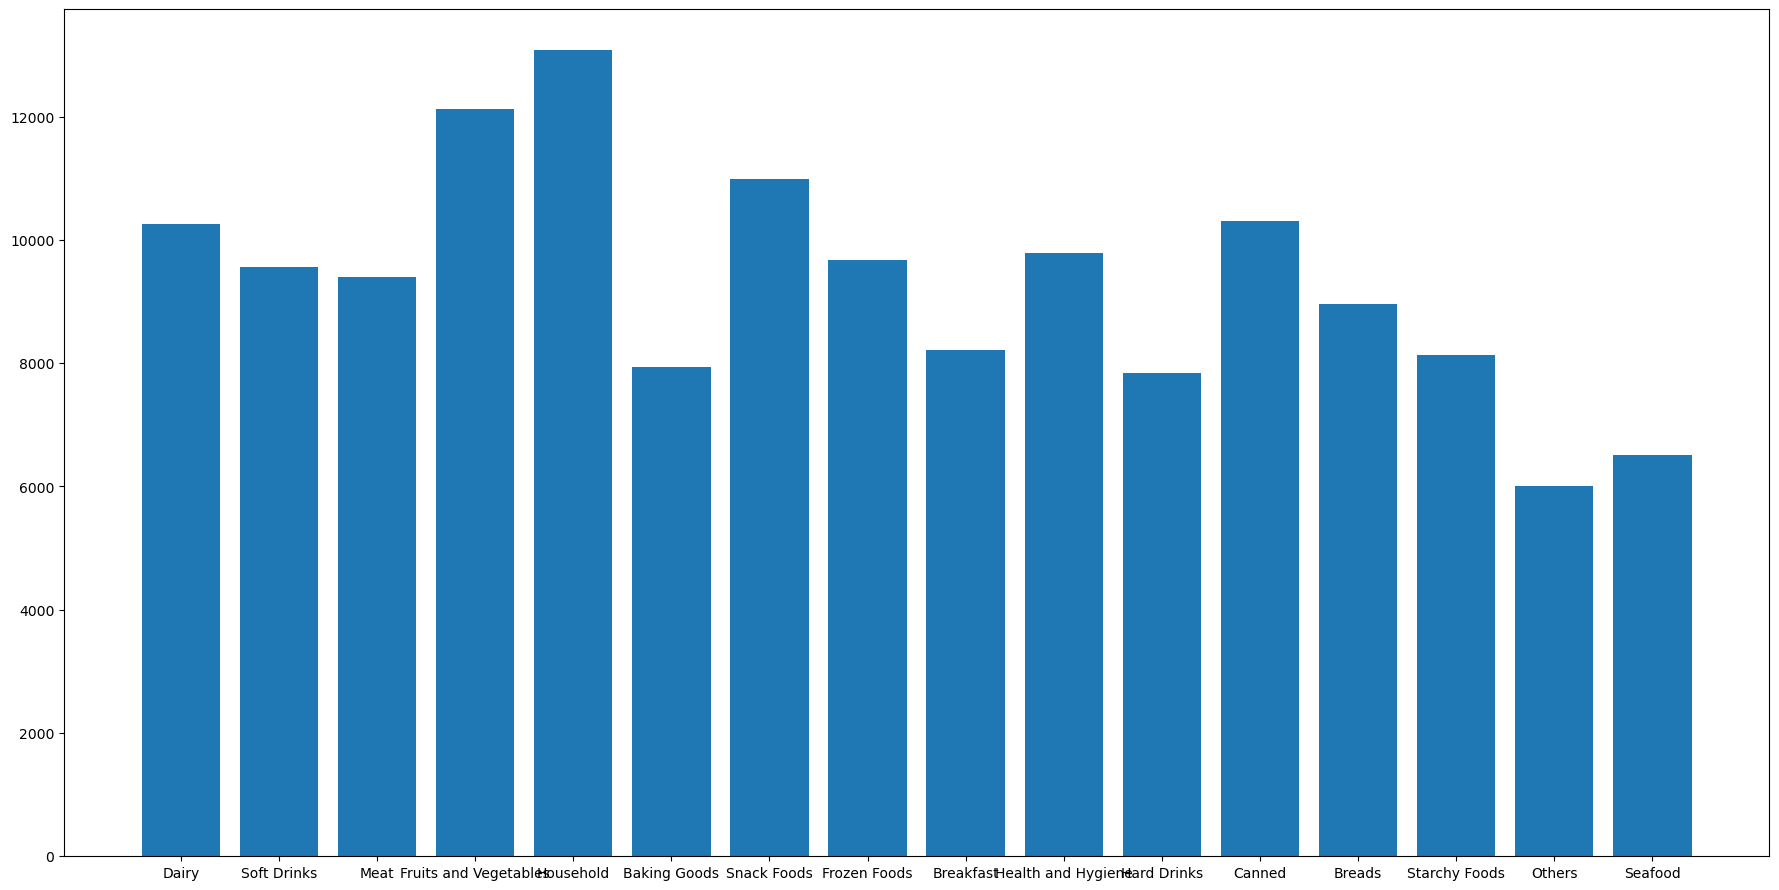

In [185]:
fig, ax = plt.subplots(figsize=(22,11))
plt.bar(df_train["Item_Type"],df_train["Item_Outlet_Sales"], width = 0.8)
#Household items contribute the most to sales followed by fruits and vegetables.

In [125]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [127]:
df_train["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

# Onehot encoding

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
encoder = LabelEncoder()

In [130]:
df_train['Item_Fat_Content'] = encoder.fit_transform(df_train['Item_Fat_Content'])

In [131]:
df_train['Outlet_Size'] = encoder.fit_transform(df_train['Outlet_Size'])

In [132]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [133]:
df_train['Outlet_Size'].unique()

array([1, 0, 2])

In [134]:
df_train['Outlet_Location_Type'] = encoder.fit_transform(df_train['Outlet_Location_Type'])

In [135]:
df_train['Outlet_Type'] = encoder.fit_transform(df_train['Outlet_Type'])

In [136]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(4), int64(1), object(3)
memory usage: 666.0+ KB


In [138]:
x_train=df_train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

# TEST DATA

In [164]:
df_test=pd.read_csv('Test.csv')

In [165]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [146]:
df_test.shape

(5681, 11)

In [147]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('LF','Low Fat')

In [148]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('reg','Regular')

In [149]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('low fat','Low Fat')

In [150]:
# filling the missing values in "Item_weight column" with "Mean" value
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [151]:
# mode of "Outlet_Size" column
df_test['Outlet_Size'].mode().values[0]

'Medium'

In [152]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode().values[0],inplace=True)

In [153]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Onehot encoding

In [154]:
df_test['Item_Fat_Content'] = encoder.fit_transform(df_test['Item_Fat_Content'])

In [155]:
df_test['Outlet_Size'] = encoder.fit_transform(df_test['Outlet_Size'])

In [156]:
df_test['Outlet_Location_Type'] = encoder.fit_transform(df_test['Outlet_Location_Type'])

In [157]:
df_test['Outlet_Type'] = encoder.fit_transform(df_test['Outlet_Type'])

In [158]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


In [140]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,249.8092,1,0,1
1,5.92,1,0.019278,48.2692,1,2,2
2,17.50,0,0.016760,141.6180,1,0,1
3,19.20,1,0.000000,182.0950,1,2,0
4,8.93,0,0.000000,53.8614,0,2,1


In [141]:
y_train=df_train['Item_Outlet_Sales']

In [142]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Test

In [159]:
x_test=df_test[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [160]:
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,107.8622,1,0,1
1,8.300000,1,0.038428,87.3198,1,1,1
2,14.600000,0,0.099575,241.7538,1,2,0
3,7.315000,0,0.015388,155.0340,1,1,1
4,12.695633,1,0.118599,234.2300,1,2,3


# MODEL TRAINING

In [166]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [167]:
lr_accuracy = round(regressor.score(x_train,y_train) * 100,2)
lr_accuracy

50.8

In [168]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [169]:
y_pred = regressor.predict(x_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [170]:
tree_accuracy = round(regressor.score(x_train,y_train),2)
tree_accuracy

0.59

In [171]:
r2_score(y_train, regressor.predict(x_train))

0.5884050821570486

In [172]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [173]:
rf_accuracy = round(regressor.score(x_train,y_train),2)
rf_accuracy

0.61

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [180]:
print("RMSE : " ,np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE :  1062.0508125884712
